In [1]:
from citipy import citipy 
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Create a practice set of random latitude and longitude combinations.
#x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
#y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
#coordinates = zip(x, y)

In [4]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

604

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7ea6b6fc43a70611a51955bf5b262681


In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [7]:
city_data = []

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1


    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                        "Lat": city_lat,
                        "Lng": city_lng,
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | saskylakh
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | chuy
Processing Record 8 of Set 1 | ahipara
Processing Record 9 of Set 1 | geraldton
Processing Record 10 of Set 1 | esperance
Processing Record 11 of Set 1 | upernavik
Processing Record 12 of Set 1 | kulunda
Processing Record 13 of Set 1 | longyearbyen
Processing Record 14 of Set 1 | mendi
Processing Record 15 of Set 1 | yantal
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | north bend
Processing Record 18 of Set 1 | otane
Processing Record 19 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 20 of Set 1 | babanusah
City not found. Skipping...
Processing Record 21 of Set 1 | punta arenas
Processing Record 22 of Set 1 | nishihara
Proce

Processing Record 42 of Set 4 | grand-santi
Processing Record 43 of Set 4 | tilichiki
Processing Record 44 of Set 4 | saleaula
City not found. Skipping...
Processing Record 45 of Set 4 | rawson
Processing Record 46 of Set 4 | marzuq
Processing Record 47 of Set 4 | miyang
Processing Record 48 of Set 4 | play cu
City not found. Skipping...
Processing Record 49 of Set 4 | makhachkala
Processing Record 50 of Set 4 | talpa
Processing Record 1 of Set 5 | samusu
City not found. Skipping...
Processing Record 2 of Set 5 | tashtagol
Processing Record 3 of Set 5 | mullaitivu
City not found. Skipping...
Processing Record 4 of Set 5 | bengkulu
Processing Record 5 of Set 5 | vernon
Processing Record 6 of Set 5 | port antonio
Processing Record 7 of Set 5 | souillac
Processing Record 8 of Set 5 | portland
Processing Record 9 of Set 5 | tornio
Processing Record 10 of Set 5 | noumea
Processing Record 11 of Set 5 | keti bandar
Processing Record 12 of Set 5 | layou
Processing Record 13 of Set 5 | diego de

Processing Record 28 of Set 8 | seoul
Processing Record 29 of Set 8 | manokwari
Processing Record 30 of Set 8 | kenora
Processing Record 31 of Set 8 | san lorenzo
Processing Record 32 of Set 8 | manado
Processing Record 33 of Set 8 | rolim de moura
City not found. Skipping...
Processing Record 34 of Set 8 | nizwa
Processing Record 35 of Set 8 | karpogory
Processing Record 36 of Set 8 | viedma
Processing Record 37 of Set 8 | oulu
Processing Record 38 of Set 8 | mount isa
Processing Record 39 of Set 8 | celestun
Processing Record 40 of Set 8 | mayumba
Processing Record 41 of Set 8 | madimba
Processing Record 42 of Set 8 | salina cruz
Processing Record 43 of Set 8 | dali
Processing Record 44 of Set 8 | yian
City not found. Skipping...
Processing Record 45 of Set 8 | mujiayingzi
Processing Record 46 of Set 8 | ciras
City not found. Skipping...
Processing Record 47 of Set 8 | teahupoo
Processing Record 48 of Set 8 | urosevac
City not found. Skipping...
Processing Record 49 of Set 8 | laguna

Processing Record 13 of Set 12 | chara
Processing Record 14 of Set 12 | tsihombe
City not found. Skipping...
Processing Record 15 of Set 12 | grand centre
City not found. Skipping...
Processing Record 16 of Set 12 | constantine
Processing Record 17 of Set 12 | blora
Processing Record 18 of Set 12 | langham
Processing Record 19 of Set 12 | itupiranga
Processing Record 20 of Set 12 | mkushi
Processing Record 21 of Set 12 | naze
Processing Record 22 of Set 12 | mangaratiba
Processing Record 23 of Set 12 | salym
Processing Record 24 of Set 12 | bandundu
Processing Record 25 of Set 12 | sao joao da barra
Processing Record 26 of Set 12 | xining
Processing Record 27 of Set 12 | san pietro in casale
Processing Record 28 of Set 12 | krasnoselkup
Processing Record 29 of Set 12 | yumen
Processing Record 30 of Set 12 | tumannyy
City not found. Skipping...
Processing Record 31 of Set 12 | ambovombe
Processing Record 32 of Set 12 | haicheng
Processing Record 33 of Set 12 | tieling
Processing Record 

In [14]:
len(city_data)

550

In [15]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saskylakh,71.9167,114.0833,-2.18,96,100,7.05,RU,2022-03-31 00:34:42
1,Rikitea,-23.1203,-134.9692,77.79,78,100,17.47,PF,2022-03-31 00:34:42
2,Puerto Ayora,-0.7393,-90.3518,78.55,94,100,1.01,EC,2022-03-31 00:34:43
3,Mataura,-46.1927,168.8643,70.00,49,97,3.20,NZ,2022-03-31 00:34:43
4,Hermanus,-34.4187,19.2345,54.81,82,100,2.44,ZA,2022-03-31 00:34:43
5,Chuy,-33.6971,-53.4616,52.83,54,17,9.57,UY,2022-03-31 00:34:44
6,Ahipara,-35.1667,173.1667,73.62,59,20,3.44,NZ,2022-03-31 00:34:44
7,Geraldton,-28.7667,114.6000,77.41,73,100,13.80,AU,2022-03-31 00:31:11
8,Esperance,-33.8667,121.9000,66.04,70,99,15.84,AU,2022-03-31 00:31:28
9,Upernavik,72.7868,-56.1549,12.74,86,46,6.64,GL,2022-03-31 00:34:45


In [16]:
# Rearrange columns in the Dataframe
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
# Print new Dataframe
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saskylakh,RU,2022-03-31 00:34:42,71.9167,114.0833,-2.18,96,100,7.05
1,Rikitea,PF,2022-03-31 00:34:42,-23.1203,-134.9692,77.79,78,100,17.47
2,Puerto Ayora,EC,2022-03-31 00:34:43,-0.7393,-90.3518,78.55,94,100,1.01
3,Mataura,NZ,2022-03-31 00:34:43,-46.1927,168.8643,70.00,49,97,3.20
4,Hermanus,ZA,2022-03-31 00:34:43,-34.4187,19.2345,54.81,82,100,2.44
5,Chuy,UY,2022-03-31 00:34:44,-33.6971,-53.4616,52.83,54,17,9.57
6,Ahipara,NZ,2022-03-31 00:34:44,-35.1667,173.1667,73.62,59,20,3.44
7,Geraldton,AU,2022-03-31 00:31:11,-28.7667,114.6000,77.41,73,100,13.80
8,Esperance,AU,2022-03-31 00:31:28,-33.8667,121.9000,66.04,70,99,15.84
9,Upernavik,GL,2022-03-31 00:34:45,72.7868,-56.1549,12.74,86,46,6.64


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Add the latitudes and longitudes to a list.
#coordinates = list(lat_lngs)

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

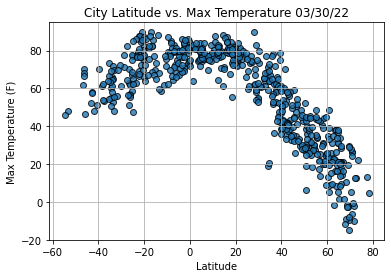

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

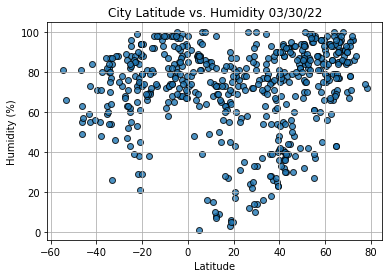

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()